In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 수집

In [5]:
boston = pd.read_csv('C:/Users/LGuser/OneDrive/바탕 화면/통계분석/house_price.csv', header=0)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [9]:
boston.shape

(506, 15)

In [ ]:
# MEDV를 복사하여 PRICE열 생성
# boston['PRICE']=  boston.MEDV

In [13]:
# MEDV 열명을 PRICE로 바꿈.
boston.rename(columns={'MEDV':'PRICE'}, inplace=True)

In [14]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CAT.MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


## 훈련데이터와 테스트데이터 나누기

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
boston_input = boston.drop(['PRICE'], axis=1, inplace=False)

In [17]:
boston_input

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,0


In [18]:
boston_target = boston['PRICE']

In [20]:
boston_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [21]:
train_input, test_input, train_target, test_target = train_test_split(boston_input, boston_target, random_state=156)

In [22]:
train_input

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT.MEDV
450,6.71772,0.0,18.10,0,0.7130,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,0
35,0.06417,0.0,5.96,0,0.4990,5.933,68.2,3.3603,5,279,19.2,396.90,9.68,0
236,0.52058,0.0,6.20,1,0.5070,6.631,76.5,4.1480,8,307,17.4,388.45,9.54,0
69,0.12816,12.5,6.07,0,0.4090,5.885,33.0,6.4980,4,345,18.9,396.90,8.79,0
297,0.14103,0.0,13.92,0,0.4370,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0,0.4530,6.762,43.4,7.9809,8,284,19.7,395.58,9.50,0
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,0
418,73.53410,0.0,18.10,0,0.6790,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,1


In [23]:
test_input

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT.MEDV
210,0.17446,0.0,10.59,1,0.489,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,0
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,1
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37,0
234,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.04560,0.0,13.89,1,0.550,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,0
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68,1
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,0
293,0.08265,0.0,13.92,0,0.437,6.127,18.4,5.5027,4,289,16.0,396.90,8.58,0


## 선형회귀분석

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(train_input, train_target)

LinearRegression()

In [27]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.8486344344170904
0.8185016229798406


In [30]:
price_predict = lr.predict(test_input)

### 오차 구하기 

In [ ]:
# mse:평균제곱오차.오차(error)를 제곱한 값의 평균. 오차란 알고리즘이 예측한 값과 실제 정답과의 차이를 의미.
# 즉, 알고리즘이 정답을 잘 맞출수록 MSE 값은 작다. 즉, MSE 값은 작을수록 알고리즘의 성능이 좋다고 볼 수 있다. 

# RMSE: 평균 제곱근 오차는 회귀 예측 모델에 대한 두 개의 주요 성과 지표 중 하나
# 평균 제곱근 오차는 예측 모델에서 예측한 값과 실제 값 사이의 평균 차이를 측정
# 예측 모델이 목표 값(정확도)을 얼마나 잘 예측할 수 있는지 추정.평균 제곱근 오차의 값이 낮을수록 예측 모델이 더 좋다. 
# 완벽한 예측 모델(항상 정확한 예상 값을 예측하는 가상의 예측 모델)은 평균 제곱근 오차 값이 0입니다.

In [32]:
# mse:평균제곱오차.오차(error)를 제곱한 값의 평균. 오차란 알고리즘이 예측한 값과 실제 정답과의 차이를 의미.
# 즉, 알고리즘이 정답을 잘 맞출수록 MSE 값은 작다. 즉, MSE 값은 작을수록 알고리즘의 성능이 좋다고 볼 수 있다. 
mse = mean_squared_error(test_target, price_predict)
rmse = np.sqrt(mse)

In [34]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 13.605, RMSE : 3.688


In [35]:
print(r2_score(test_target, price_predict))

0.8185016229798406


In [36]:
# 절편: 기울기값 
# 회귀계수값은 실제 값과 추정한 값의 차이가 적을수록 좋은 것
print('Y 절편값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편값:  43.81019844000462
회귀 계수 값:  [ -0.1  -0.    0.2   2.  -17.8   0.7  -0.   -0.9   0.2  -0.   -0.6   0.
  -0.5  12.9]


In [37]:
coef = pd.Series(data = np.round(lr.coef_, 2), index= boston_input.columns)

In [38]:
coef

CRIM        -0.14
ZN          -0.00
INDUS        0.15
CHAS         2.00
NOX        -17.78
RM           0.70
AGE         -0.01
DIS         -0.88
RAD          0.23
TAX         -0.01
PTRATIO     -0.55
B            0.01
LSTAT       -0.48
CAT.MEDV    12.88
dtype: float64

In [39]:
coef.sort_values(ascending= False)

CAT.MEDV    12.88
CHAS         2.00
RM           0.70
RAD          0.23
INDUS        0.15
B            0.01
ZN          -0.00
AGE         -0.01
TAX         -0.01
CRIM        -0.14
LSTAT       -0.48
PTRATIO     -0.55
DIS         -0.88
NOX        -17.78
dtype: float64

## 시각화

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

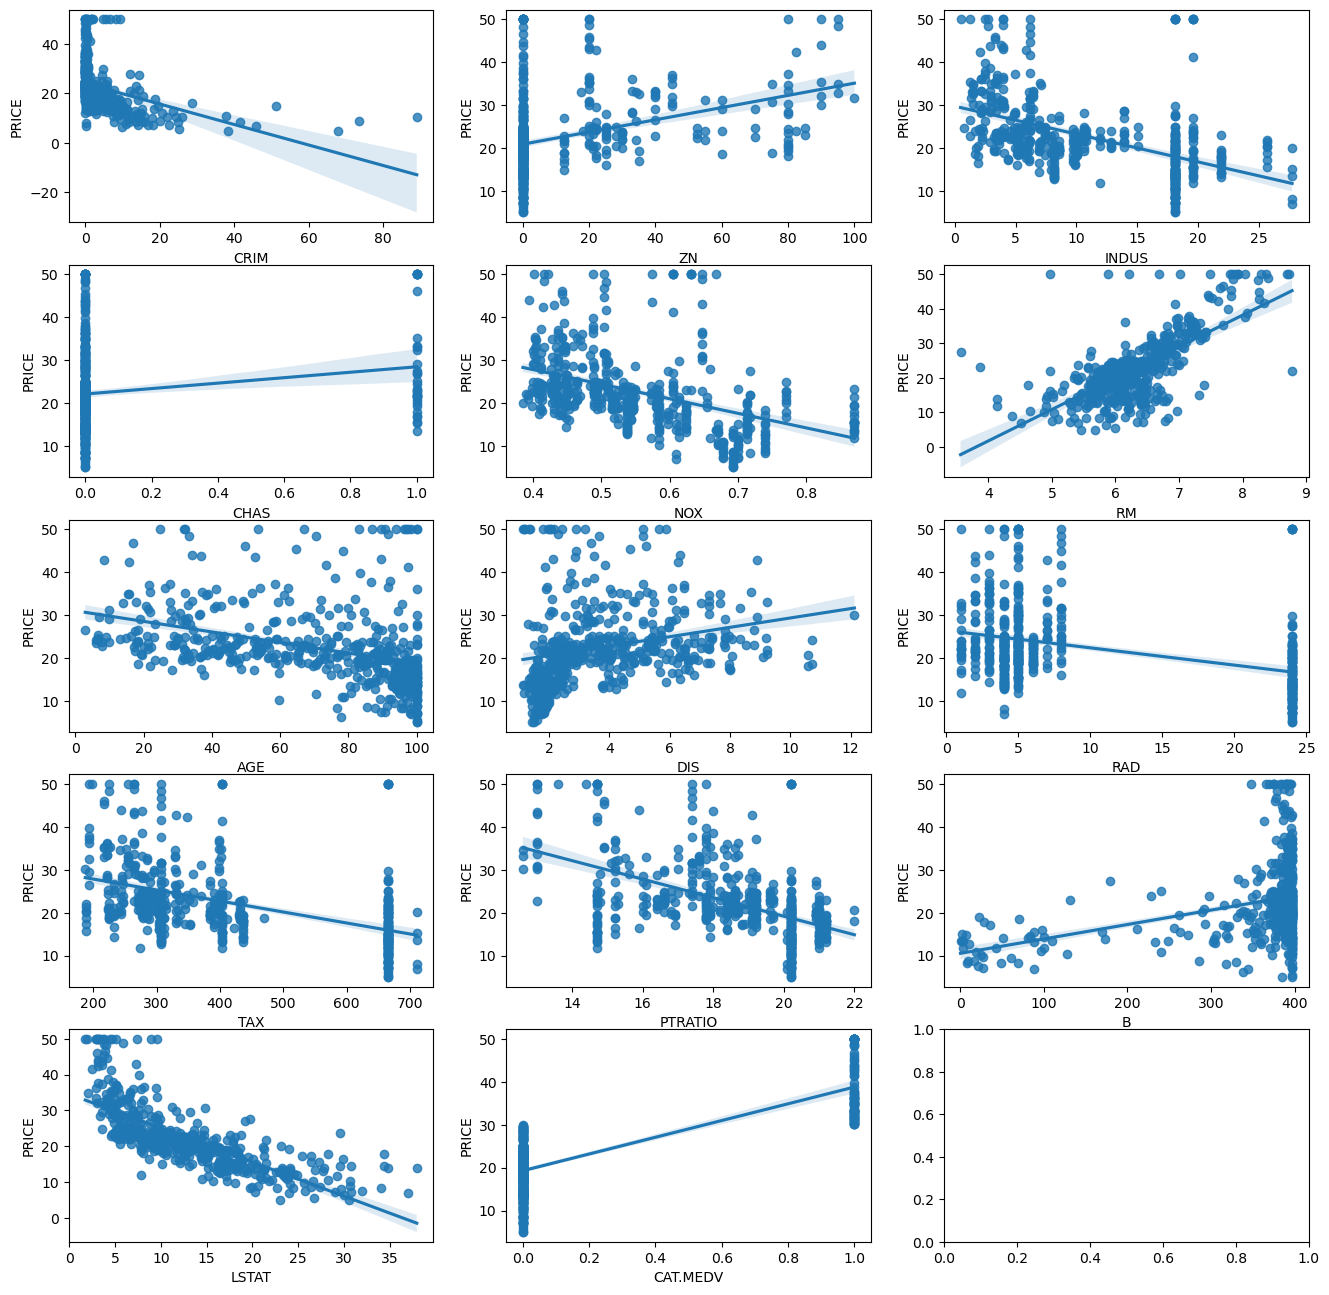

In [42]:
fig, axs = plt.subplots(figsize= (16, 16), ncols= 3, nrows= 5)
x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CAT.MEDV']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x= feature, y= 'PRICE', data = boston, ax= axs[row][col])